In [ ]:
# First we download the data

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1UJVoJqzHc7DZC8YDCN8e15LA6DvEnsuY' -O X.txt
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=15HONyJXWARLhNAtNQXFWAH8pvGPahh_U' -O y.txt

--2023-03-21 22:11:22--  https://docs.google.com/uc?export=download&id=1UJVoJqzHc7DZC8YDCN8e15LA6DvEnsuY
Resolving docs.google.com (docs.google.com)... 64.233.188.138, 64.233.188.100, 64.233.188.102, ...
Connecting to docs.google.com (docs.google.com)|64.233.188.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-88-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u6196hlcln9i481jbk9vfcismjtc5gnp/1679436675000/03911252296720181638/*/1UJVoJqzHc7DZC8YDCN8e15LA6DvEnsuY?e=download&uuid=ef1908dd-bdff-4a2e-90ec-2c628c9cf502 [following]
--2023-03-21 22:11:23--  https://doc-0c-88-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u6196hlcln9i481jbk9vfcismjtc5gnp/1679436675000/03911252296720181638/*/1UJVoJqzHc7DZC8YDCN8e15LA6DvEnsuY?e=download&uuid=ef1908dd-bdff-4a2e-90ec-2c628c9cf502
Resolving doc-0c-88-docs.googleusercontent.com (doc-0c-88-docs.googleusercontent.com)... 142.251.8.132, 2404:6800:4

In [ ]:
# We load the data

import numpy as np

X = np.loadtxt('X.txt')
y = np.loadtxt('y.txt')

# We randomly permute the data

permutation = np.random.permutation(X.shape[ 0 ])
X = X[ permutation, : ]
y = y[ permutation ]

print(X)

[[ 1.29000756 -0.97092518]
 [-0.37500922  0.83712231]
 [-1.42885477  0.07459075]
 ...
 [ 0.84399518 -0.34071013]
 [ 1.10852708 -1.31475783]
 [ 0.25038785 -1.67301032]]


In [ ]:
# We plot the data

import matplotlib.pyplot as plt

##
# Function that plots the points in 2D together with their labels
#
# Inputs:
#
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
#
# Output: 2D matrices with the x and y coordinates of the points shown in the plot
#

def plot_data_internal(X, y):
    x_min, x_max = X[ :, 0 ].min() - .5, X[ :, 0 ].max() + .5
    y_min, y_max = X[ :, 1 ].min() - .5, X[ :, 1 ].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    plt.figure()
    plt.xlim(xx.min(None), xx.max(None))
    plt.ylim(yy.min(None), yy.max(None))
    ax = plt.gca()
    ax.plot(X[y == 0, 0], X[y == 0, 1], 'ro', label = 'Class 1')
    ax.plot(X[y == 1, 0], X[y == 1, 1], 'bo', label = 'Class 2')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Plot data')
    plt.legend(loc = 'upper left', scatterpoints = 1, numpoints = 1)
    return xx, yy

##
# Function that plots the data without returning anything by calling "plot_data_internal".
#
# Input:
#
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
#
# Output: Nothing.
#

def plot_data(X, y):
    xx, yy = plot_data_internal(X, y)
    plt.show()

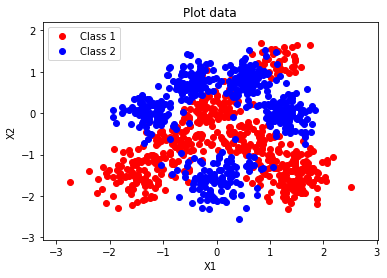

In [ ]:
plot_data(X, y)

In [ ]:
# We split the data into train and test sets

n_train = 800
X_train = X[ 0 : n_train, : ]
X_test = X[ n_train :, : ]
y_train = y[ 0 : n_train ]
y_test = y[ n_train : ]

In [ ]:
# The logistic function

def logistic(x): return 1.0 / (1.0 + np.exp(-x))

##
# Function that makes predictions with a logistic classifier
#
# Input:
#
# X_tile: matrix of input features (with a constant 1 appended to the left) 
#         for which to make predictions
# w: vector of model parameters
#
# Output: The predictions of the logistic classifier
#

def predict(X_tilde, w): return logistic(np.dot(X_tilde, w))

##
# Function that computes the average loglikelihood of the logistic classifier on some data.
#
# Input:
#
# X_tile: matrix of input features (with a constant 1 appended to the left) 
#         for which to make predictions
# y: vector of binary output labels 
# w: vector of model parameters
#
# Output: The average loglikelihood
#

def compute_average_ll(X_tilde, y, w):
    output_prob = predict(X_tilde, w)
    return np.mean(y * np.log(output_prob) + (1 - y) * np.log(1.0 - output_prob))

##
# Function that expands a matrix of input features by adding a column equal to 1.
#
# Input:
#
# X: matrix of input features.
#
# Output: Matrix x_tilde with one additional constant column equal to 1 added.
#

def get_x_tilde(X): return np.concatenate((np.ones((X.shape[ 0 ], 1 )), X), 1)

In [ ]:
##
# Function that finds the model parameters by optimising the likelihood using gradient descent
#
# Input:
#
# X_tile_train: matrix of training input features (with a constant 1 appended to the left) 
# y_train: vector of training binary output labels 
# X_tile_test: matrix of test input features (with a constant 1 appended to the left) 
# y_test: vector of test binary output labels 
# alpha: step_size_parameter for the gradient based optimisation
# n_steps: the number of steps of gradient based optimisation
#
# Output: 
# 
# 1 - Vector of model parameters w 
# 2 - Vector with average log-likelihood values obtained on the training set
# 3 - Vector with average log-likelihood values obtained on the test set
#
def fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha):
    w = np.random.randn(X_tilde_train.shape[ 1 ])
    ll_train = np.zeros(n_steps)
    ll_test = np.zeros(n_steps)
    for i in range(n_steps):
        sigmoid_value = predict(X_tilde_train, w)
        gradientLog = np.dot((y_train-sigmoid_value),X_tilde_train)
        w = w + alpha*gradientLog # XXX Gradient-based update rule for w. To be completed by the student

        ll_train[ i ] = compute_average_ll(X_tilde_train, y_train, w)
        ll_test[ i ] = compute_average_ll(X_tilde_test, y_test, w)
        print(ll_train[ i ], ll_test[ i ])

    return w, ll_train, ll_test

In [ ]:
# We train the classifier

alpha = 0.002# XXX Learning rate for gradient-based optimisation. To be completed by the student
n_steps = 100# XXX Number of steps of gradient-based optimisation. To be completed by the student

X_tilde_train = get_x_tilde(X_train)
X_tilde_test = get_x_tilde(X_test)
w, ll_train, ll_test = fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha)

-0.6993278722836684 -0.7261945901106209
-0.642581749836936 -0.660017121893719
-0.6275204703356859 -0.6424379387909531
-0.6230316625989931 -0.6377102270025748
-0.6214459374657421 -0.6365741186140416
-0.6207950090060899 -0.6365268729328339
-0.6204926363994301 -0.6368011039553491
-0.620337843667737 -0.6371415976180734
-0.620252693204471 -0.6374629214407522
-0.6202034418428128 -0.6377400513071697
-0.62017398545177 -0.637969893176411
-0.620155982672142 -0.6381568970425487
-0.6201448274274258 -0.6383075394814735
-0.6201378547575126 -0.6384282473583527
-0.6201334723556312 -0.6385246934544203
-0.6201307082775238 -0.6386016379064259
-0.6201289609641727 -0.638662976635961
-0.6201278547657809 -0.6387118568933476
-0.6201271537602523 -0.6387508034090118
-0.6201267092332716 -0.6387818339653882
-0.6201264272173814 -0.6388065580468363
-0.6201262482438535 -0.6388262582280728
-0.6201261346370925 -0.6388419561489407
-0.6201260625109646 -0.6388544654968551
-0.6201260167141558 -0.6388644343463704
-0.620125

In [ ]:
##
# Function that plots the average log-likelihood returned by "fit_w"
#
# Input:
#
# ll: vector with log-likelihood values
#
# Output: Nothing
#

def plot_ll(ll):
    plt.figure()
    ax = plt.gca()
    plt.xlim(0, len(ll) + 2)
    plt.ylim(min(ll) - 0.1, max(ll) + 0.1)
    ax.plot(np.arange(1, len(ll) + 1), ll, 'r-')
    plt.xlabel('Steps')
    plt.ylabel('Average log-likelihood')
    plt.title('Plot Average Log-likelihood Curve')
    plt.show()


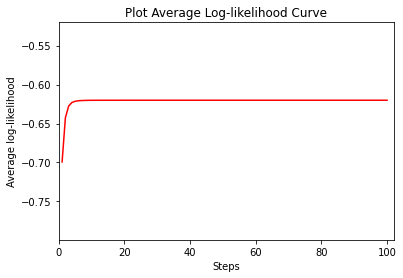

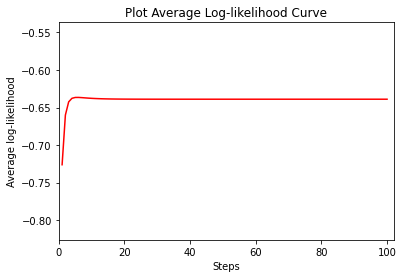

In [ ]:
# We plot the training and test log likelihoods

plot_ll(ll_train)
plot_ll(ll_test)

In [ ]:
##
# Function that plots the predictive probabilities of the logistic classifier
#
# Input:
#
# X: 2d array with the input features for the data (without adding a constant column with ones at the beginning)
# y: 1d array with the class labels (0 or 1) for the data
# w: parameter vector
# map_inputs: function that expands the original 2D inputs using basis functions.
#
# Output: Nothing.
#

def plot_predictive_distribution(X, y, w, map_inputs = lambda x : x):
    xx, yy = plot_data_internal(X, y)
    ax = plt.gca()
    X_tilde = get_x_tilde(map_inputs(np.concatenate((xx.ravel().reshape((-1, 1)), yy.ravel().reshape((-1, 1))), 1)))
    Z = predict(X_tilde, w)
    Z = Z.reshape(xx.shape)
    cs2 = ax.contour(xx, yy, Z, cmap = 'RdBu', linewidths = 2)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize = 14)
    plt.show()

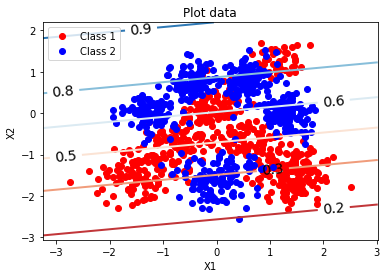

In [ ]:
# We plot the predictive distribution

plot_predictive_distribution(X, y, w)

In [ ]:
##
# Function that replaces initial input features by evaluating Gaussian basis functions
# on a grid of points
#
# Inputs:
#
# l: hyper-parameter for the width of the Gaussian basis functions
# Z: location of the Gaussian basis functions
# X: points at which to evaluate the basis functions
#
# Output: Feature matrix with the evaluations of the Gaussian basis functions.
#

def evaluate_basis_functions(l, X, Z):
    X2 = np.sum(X**2, 1)
    Z2 = np.sum(Z**2, 1)
    ones_Z = np.ones(Z.shape[ 0 ])
    ones_X = np.ones(X.shape[ 0 ])
    r2 = np.outer(X2, ones_Z) - 2 * np.dot(X, Z.T) + np.outer(ones_X, Z2)
    return np.exp(-0.5 / l**2 * r2)

In [ ]:
from sklearn.metrics import confusion_matrix
def threshold(y_pred):           # compute a array of class label according to threshold
    output = []
    y_list = y_pred.tolist()
    for val in y_list:
      if val > 0.5:
        output.append(1)
      else:
        output.append(0)
    return np.array(output)

def normalization(y_test):       #get the number of 0 and 1 in class array
  return np.unique(y_test, return_counts=True)[1]

def confusionProbability(X_tilde_test, w, y_test):
    y_pred = predict(X_tilde_test, w)
    cm = confusion_matrix(y_test, threshold(y_pred))
    print(cm[0][0]/normalization(y_test)[0])
    print(cm[0][1]/normalization(y_test)[0])
    print(cm[1][0]/normalization(y_test)[1])
    print(cm[1][1]/normalization(y_test)[1])

print(normalization(y_test))
confusionProbability(X_tilde_test, w, y_test)

[113  87]
0.6548672566371682
0.34513274336283184
0.28735632183908044
0.7126436781609196


In [ ]:
# We expand the data

l = 1 # XXX Width of the Gaussian basis funcction. To be completed by the student

X_tilde_train = get_x_tilde(evaluate_basis_functions(l, X_train, X_train))
X_tilde_test = get_x_tilde(evaluate_basis_functions(l, X_test, X_train))

In [ ]:
# We train the new classifier on the feature expanded inputs

alpha = 0.00003# XXX Learning rate for gradient-based optimisation with basis functions. To be completed by the student
n_steps = 3000# XXX Number of steps of gradient-based optimisation with basis functions. To be completed by the student

w, ll_train, ll_test = fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha)

-3.06171999604479 -3.872508628859162
-2.871769820208782 -3.6197659603548233
-2.7129379542984484 -3.404662478363783
-2.5773645654183612 -3.2186648540497216
-2.4590030331021286 -3.055119985433887
-2.353628612197607 -2.9092685486280776
-2.258435231506311 -2.7778187633058655
-2.1715962634457706 -2.6584946081487324
-2.091916654131732 -2.5496855303410855
-2.0185905598299168 -2.4502041479635186
-1.951041485677636 -2.359126127543358
-1.8888187073479685 -2.2756871351277934
-1.8315317470841586 -2.1992189265026334
-1.7788125674296318 -2.1291126203740838
-1.7302989191749052 -2.0648010345406234
-1.6856325148150217 -2.005753490489462
-1.6444651345597538 -1.9514768965615787
-1.6064666318525735 -1.9015180829715845
-1.5713311466492812 -1.8554646321796902
-1.5387803011769479 -1.8129436609744565
-1.5085637028899774 -1.773619192518352
-1.4804576263363085 -1.7371889293039797
-1.4542627072516603 -1.7033809501824657
-1.4298012503272852 -1.671950553206845
-1.4069145242365213 -1.6426773066419542
-1.38546025034

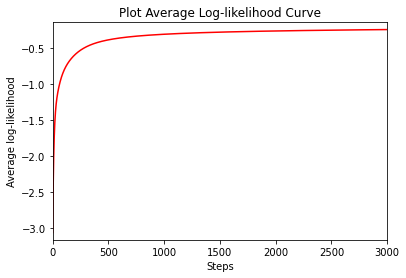

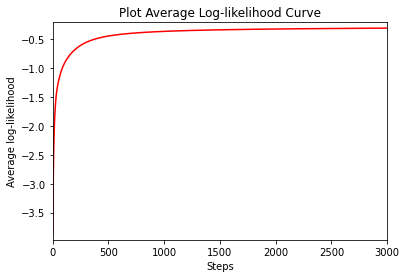

In [ ]:

# We plot the training and test log likelihoods

plot_ll(ll_train)
plot_ll(ll_test)

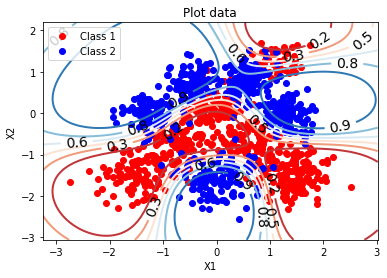

In [ ]:
# We plot the predictive distribution

plot_predictive_distribution(X, y, w, lambda x : evaluate_basis_functions(l, x, X_train))